In [ ]:
!pip install Sastrawi

In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
import re
import joblib
import nltk
nltk.download('punkt')

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm_notebook as tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Emotion_Dataset.csv')
df

,label,tweet
0,1,"Dari sekian banyak thread yang aku baca, threa..."
1,1,"Contoh mereka yg gemar menyudutkan, teriak pal..."
2,1,Betul Min rakyat Indonesia sekarang harapan ny...
3,1,Kalaupun fansite ngejual hasil jepretan mereka...
4,1,samanye udeh maling semua gak si jancok gak si...
...,...,...
4393,1,bukan saya yang tidak-mau merit sat ini hubung...
4394,1,Baru lihat kabar Teman nge gosip dan penuh inf...
4395,1,Mengubah kebiasaan seseorang yg kurang baik it...
4396,1,nah diam lebih bagus yaudah saya diam saja deh...


1    2744
0    1654
Name: label, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
Persentase data positif:  37.60800363801728 %
Persentase data negatif:  62.39199636198271 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


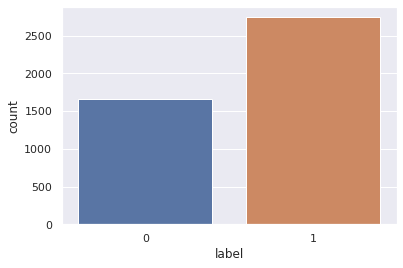

In [ ]:
#menampilkan jumlah dataset

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

print(df['label'].value_counts())
print(sns.countplot(df['label']))

positif = len(df[df.label == 0])
negatif = len(df[df.label == 1])

persenpos = positif/(positif+negatif) * 100
persenneg = negatif/(positif+negatif) * 100
print('Persentase data positif: ', persenpos,'%')
print('Persentase data negatif: ', persenneg,'%')

In [ ]:
#casefolding

DataTweet = df['tweet']
DataLabel = df['label']

def casefolding(sentence):
  Tweet = sentence.lower()
  return Tweet

HasilCaseFold = []
for sentence in DataTweet:
  buffer = casefolding(sentence)
  HasilCaseFold.append(buffer)

df['casefolding'] = HasilCaseFold
df.head()

,label,tweet,casefolding
0,1,"Dari sekian banyak thread yang aku baca, threa...","dari sekian banyak thread yang aku baca, threa..."
1,1,"Contoh mereka yg gemar menyudutkan, teriak pal...","contoh mereka yg gemar menyudutkan, teriak pal..."
2,1,Betul Min rakyat Indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...
3,1,Kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...
4,1,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...


In [ ]:
#Cleaning
def cleaning(data):
  temp_tweet = []

  for tweet in data:
    tweet = re.sub(r"(?:\@|https?\://)\S+", "", tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('RT', '', tweet)
    tweet = re.sub("[^a-zA-Z^']", " ", tweet)
    tweet = re.sub(" {2,}", " ", tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.lower();
    temp_tweet.append(tweet)
  return temp_tweet

df['clean_tweet']=cleaning(df['casefolding'])
df.head()

,label,tweet,casefolding,clean_tweet
0,1,"Dari sekian banyak thread yang aku baca, threa...","dari sekian banyak thread yang aku baca, threa...",dari sekian banyak thread yang aku baca thread...
1,1,"Contoh mereka yg gemar menyudutkan, teriak pal...","contoh mereka yg gemar menyudutkan, teriak pal...",contoh mereka yg gemar menyudutkan teriak pali...
2,1,Betul Min rakyat Indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...
3,1,Kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...
4,1,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...


In [ ]:
#Stemming
stemmer = StemmerFactory().create_stemmer()

def stemming(data):
  buffer = stemmer.stem(data)
  return buffer
  
df['stemmer'] = [stemming(n) for n in tqdm(df['clean_tweet'])]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/4398 [00:00<?, ?it/s]

,label,tweet,casefolding,clean_tweet,stemmer
0,1,"Dari sekian banyak thread yang aku baca, threa...","dari sekian banyak thread yang aku baca, threa...",dari sekian banyak thread yang aku baca thread...,dari sekian banyak thread yang aku baca thread...
1,1,"Contoh mereka yg gemar menyudutkan, teriak pal...","contoh mereka yg gemar menyudutkan, teriak pal...",contoh mereka yg gemar menyudutkan teriak pali...,contoh mereka yg gemar sudut teriak paling tol...
2,1,Betul Min rakyat Indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harap nya ...
3,1,Kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepret mereka t...
4,1,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...


In [ ]:
#Stopword
stopword = StopWordRemoverFactory().create_stop_word_remover()
def stopwords(data):
  buffer = stopword.remove(data)
  return buffer
  
df['stopwords'] = [stopwords(n) for n in tqdm(df['stemmer'])]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/4398 [00:00<?, ?it/s]

,label,tweet,casefolding,clean_tweet,stemmer,stopwords
0,1,"Dari sekian banyak thread yang aku baca, threa...","dari sekian banyak thread yang aku baca, threa...",dari sekian banyak thread yang aku baca thread...,dari sekian banyak thread yang aku baca thread...,sekian banyak thread aku baca thread paling an...
1,1,"Contoh mereka yg gemar menyudutkan, teriak pal...","contoh mereka yg gemar menyudutkan, teriak pal...",contoh mereka yg gemar menyudutkan teriak pali...,contoh mereka yg gemar sudut teriak paling tol...,contoh yg gemar sudut teriak paling toleran tp...
2,1,Betul Min rakyat Indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harap nya ...,betul min rakyat indonesia sekarang harap nya ...
3,1,Kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepret mereka t...,kalaupun fansite ngejual hasil jepret toh uang...
4,1,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...


In [ ]:
#Hapus Indeks Dataframe Kosong
indeks = df[df['stopwords'] == ""].index  
df.drop(indeks, inplace=True)

In [ ]:
#Tokenizing
def tokenizing(data):
  return data.apply(nltk.word_tokenize)

df['Tokenized']=tokenizing(df['stopwords'])
df.head()

,label,tweet,casefolding,clean_tweet,stemmer,stopwords,Tokenized
0,1,"Dari sekian banyak thread yang aku baca, threa...","dari sekian banyak thread yang aku baca, threa...",dari sekian banyak thread yang aku baca thread...,dari sekian banyak thread yang aku baca thread...,sekian banyak thread aku baca thread paling an...,"[sekian, banyak, thread, aku, baca, thread, pa..."
1,1,"Contoh mereka yg gemar menyudutkan, teriak pal...","contoh mereka yg gemar menyudutkan, teriak pal...",contoh mereka yg gemar menyudutkan teriak pali...,contoh mereka yg gemar sudut teriak paling tol...,contoh yg gemar sudut teriak paling toleran tp...,"[contoh, yg, gemar, sudut, teriak, paling, tol..."
2,1,Betul Min rakyat Indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harap nya ...,betul min rakyat indonesia sekarang harap nya ...,"[betul, min, rakyat, indonesia, sekarang, hara..."
3,1,Kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepret mereka t...,kalaupun fansite ngejual hasil jepret toh uang...,"[kalaupun, fansite, ngejual, hasil, jepret, to..."
4,1,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,"[samanye, udeh, maling, semua, gak, si, jancok..."


In [ ]:
df['Tokenized']=df['Tokenized'].apply(str)
df

,label,tweet,casefolding,clean_tweet,stemmer,stopwords,Tokenized
0,1,"Dari sekian banyak thread yang aku baca, threa...","dari sekian banyak thread yang aku baca, threa...",dari sekian banyak thread yang aku baca thread...,dari sekian banyak thread yang aku baca thread...,sekian banyak thread aku baca thread paling an...,"['sekian', 'banyak', 'thread', 'aku', 'baca', ..."
1,1,"Contoh mereka yg gemar menyudutkan, teriak pal...","contoh mereka yg gemar menyudutkan, teriak pal...",contoh mereka yg gemar menyudutkan teriak pali...,contoh mereka yg gemar sudut teriak paling tol...,contoh yg gemar sudut teriak paling toleran tp...,"['contoh', 'yg', 'gemar', 'sudut', 'teriak', '..."
2,1,Betul Min rakyat Indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harap nya ...,betul min rakyat indonesia sekarang harap nya ...,"['betul', 'min', 'rakyat', 'indonesia', 'sekar..."
3,1,Kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepret mereka t...,kalaupun fansite ngejual hasil jepret toh uang...,"['kalaupun', 'fansite', 'ngejual', 'hasil', 'j..."
4,1,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,"['samanye', 'udeh', 'maling', 'semua', 'gak', ..."
...,...,...,...,...,...,...,...
4393,1,bukan saya yang tidak-mau merit sat ini hubung...,bukan saya yang tidak-mau merit sat ini hubung...,bukan saya yang tidak mau merit sat ini hubung...,bukan saya yang tidak mau rit sat ini hubung s...,bukan yang mau rit sat hubung lagi baik ama ri...,"['bukan', 'yang', 'mau', 'rit', 'sat', 'hubung..."
4394,1,Baru lihat kabar Teman nge gosip dan penuh inf...,baru lihat kabar teman nge gosip dan penuh inf...,baru lihat kabar teman nge gosip dan penuh inf...,baru lihat kabar teman nge gosip dan penuh inf...,baru lihat kabar teman nge gosip penuh info te...,"['baru', 'lihat', 'kabar', 'teman', 'nge', 'go..."
4395,1,Mengubah kebiasaan seseorang yg kurang baik it...,mengubah kebiasaan seseorang yg kurang baik it...,mengubah kebiasaan seseorang yg kurang baik it...,ubah biasa orang yg kurang baik itu berat mest...,ubah biasa orang yg kurang baik berat mesti ku...,"['ubah', 'biasa', 'orang', 'yg', 'kurang', 'ba..."
4396,1,nah diam lebih bagus yaudah saya diam saja deh...,nah diam lebih bagus yaudah saya diam saja deh...,nah diam lebih bagus yaudah saya diam saja deh...,nah diam lebih bagus yaudah saya diam saja deh...,nah diam lebih bagus yaudah diam deh kepo deh ...,"['nah', 'diam', 'lebih', 'bagus', 'yaudah', 'd..."


In [ ]:
#df.to_csv('/content/drive/MyDrive/Tugas Akhir/hasil.csv', index=None)

In [ ]:
#TFIDF
x = df['Tokenized']
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size= 0.1)

def pembobotan():
  vectorizer = TfidfVectorizer(min_df=5,
                               max_df=0.5,
                               use_idf= True,
                               smooth_idf = False,
                               lowercase=False,
                               ngram_range=(1,1))
  
  train_vectors = vectorizer.fit_transform(x_train)
  test_vectors = vectorizer.transform(x_test)
  joblib.dump(vectorizer,'/content/drive/MyDrive/Tugas Akhir/TF-IDF Vectorizer.joblib')

  kolom = vectorizer.get_feature_names()
  df1 = pd.DataFrame(train_vectors.toarray(), columns= kolom)
  x_train.reset_index(drop=True, inplace=True)
  df1.insert(0,'Tokenized', x_train)
  #df1.to_excel("/content/drive/MyDrive/Tugas Akhir/hasilTFIDF.xlsx",index=None, engine='openpyxl')
  
  return train_vectors,test_vectors

train_vectors,test_vectors = pembobotan()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Klasifikasi KNN
KNN = KNeighborsClassifier(n_neighbors = 9, weights='distance', metric='euclidean')
KNN.fit(train_vectors, y_train)
y_pred = KNN.predict(test_vectors)
joblib.dump(KNN, '/content/drive/MyDrive/Tugas Akhir/KNN Klasifikasi.joblib')
print('\nK Nearest Neighbors (KK = 9)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')


K Nearest Neighbors (KK = 9)
Accuracy Score: 78.63636363636364%


In [ ]:
#Confusion Matrix
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

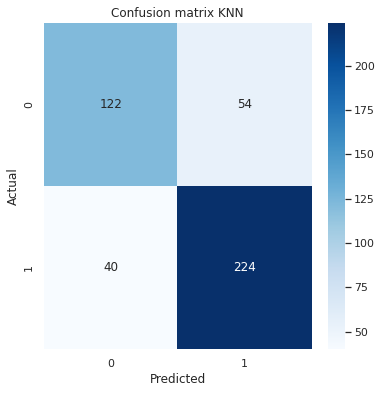

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       176
           1       0.81      0.85      0.83       264

    accuracy                           0.79       440
   macro avg       0.78      0.77      0.77       440
weighted avg       0.78      0.79      0.78       440



In [ ]:
print_conf(y_test, y_pred, [0, 1], title="Confusion matrix KNN")
print(metrics.classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("KNN Accuracy Score: ",accuracy_score(y_pred, y_test)*100)
print("KNN Recall Score: ",recall_score(y_pred, y_test)*100)
print("KNN Precision Score: ",precision_score(y_pred, y_test)*100)
print("KNN f1 Score: ",f1_score(y_pred, y_test)*100)

KNN Accuracy Score:  78.63636363636364
KNN Recall Score:  80.57553956834532
KNN Precision Score:  84.84848484848484
KNN f1 Score:  82.65682656826569


In [ ]:
vectorizer = joblib.load('/content/drive/MyDrive/Tugas Akhir/TF-IDF Vectorizer.joblib')
#hasil prediksi 
df['prediction'] = KNN.predict(vectorizer.transform(df['tweet']))
df['prediction'] = df['prediction'].apply(lambda x: 'negatif' if x==1 else 'positif')

# Save new dataframe into csv file
df.to_csv('/content/drive/MyDrive/Tugas Akhir/prediksiKNN.csv', index=False)
df.head()

,label,tweet,casefolding,clean_tweet,stemmer,stopwords,Tokenized,prediction
0,1,"Dari sekian banyak thread yang aku baca, threa...","dari sekian banyak thread yang aku baca, threa...",dari sekian banyak thread yang aku baca thread...,dari sekian banyak thread yang aku baca thread...,sekian banyak thread aku baca thread paling an...,"['sekian', 'banyak', 'thread', 'aku', 'baca', ...",negatif
1,1,"Contoh mereka yg gemar menyudutkan, teriak pal...","contoh mereka yg gemar menyudutkan, teriak pal...",contoh mereka yg gemar menyudutkan teriak pali...,contoh mereka yg gemar sudut teriak paling tol...,contoh yg gemar sudut teriak paling toleran tp...,"['contoh', 'yg', 'gemar', 'sudut', 'teriak', '...",negatif
2,1,Betul Min rakyat Indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harapan ny...,betul min rakyat indonesia sekarang harap nya ...,betul min rakyat indonesia sekarang harap nya ...,"['betul', 'min', 'rakyat', 'indonesia', 'sekar...",negatif
3,1,Kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepretan mereka...,kalaupun fansite ngejual hasil jepret mereka t...,kalaupun fansite ngejual hasil jepret toh uang...,"['kalaupun', 'fansite', 'ngejual', 'hasil', 'j...",negatif
4,1,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,samanye udeh maling semua gak si jancok gak si...,"['samanye', 'udeh', 'maling', 'semua', 'gak', ...",negatif


In [ ]:
dfhasil = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/prediksiKNN.csv')

Persentase data positif: 1434
Persentase data negatif: 2964
Persentase prediksi positif:  32.605729877216916 %
Persentase prediksi negatif:  67.39427012278308 %
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


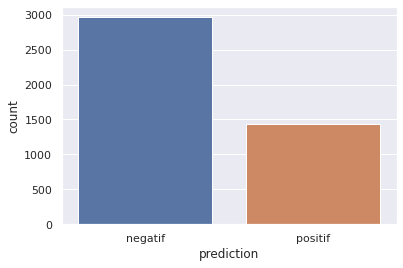

In [ ]:
positif = len(dfhasil[dfhasil.prediction == 'positif'])
negatif = len(dfhasil[dfhasil.prediction == 'negatif'])
print('Persentase data positif:',positif)
print('Persentase data negatif:',negatif)
persenpos = positif/(positif+negatif) * 100
persenneg = negatif/(positif+negatif) * 100
print('Persentase prediksi positif: ', persenpos,'%')
print('Persentase prediksi negatif: ', persenneg,'%')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

print(sns.countplot(dfhasil['prediction']))

In [ ]:
datasetbaru = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/unlabel.csv')

In [ ]:
datasetbaru['akun'].value_counts()

sayangunii       397
wdyaoktp         369
hadehtasya       339
rasnurani        325
_kusharjanti_    323
ubucilembi       316
zsandrs          281
ddndaaa          263
jgnlupasedih     255
febmel_          247
arranjj          234
fannypuspitar    204
faiqmh           166
yulida_NR         92
yaakunsambat      75
Name: akun, dtype: int64

In [ ]:
vectorizer = joblib.load('/content/drive/MyDrive/Tugas Akhir/TF-IDF Vectorizer.joblib')
KNN = joblib.load('/content/drive/MyDrive/Tugas Akhir/KNN Klasifikasi.joblib')

nama_akun = ["sayangunii","wdyaoktp","hadehtasya","rasnurani","_kusharjanti_",
             "ubucilembi","zsandrs","ddndaaa","jgnlupasedih","febmel_","arranjj","fannypuspitar","faiqmh","yulida_NR","yaakunsambat"]

#sayangunii = datasetbaru[datasetbaru['akun'] == "sayangunii"].index
for i in nama_akun:
  n1 = 0
  n2 = 0
  test_vectors = vectorizer.transform(datasetbaru.Tokenized[datasetbaru[datasetbaru['akun'] == i].index])
  hasil = KNN.predict(test_vectors)
  for j in hasil:
    if(j==1):
      n1+=1
    else:
      n2+=1
  #print('n1 = ',n1)
  #print('n2 = ',n2)
  print('Nama akun:',i)
  print('Jumlah Tweet:',len(datasetbaru.Tokenized[datasetbaru[datasetbaru['akun'] == i].index]))
  if (n1 > n2) :
    print('Hasil Prediksi: Cenderung negatif \nPersentase data negatif: ', (n1/(n1+n2)*100),'%',"\n")
  else :
    print('Hasil Prediksi: Cenderung positif \nPersentase data positif: ', (n2/(n1+n2)*100),'%',"\n")

  print('Accuracy Score: ',metrics.accuracy_score(datasetbaru.label[datasetbaru[datasetbaru['akun'] == i].index],hasil)*100,'%',sep='')

Nama akun: sayangunii
Jumlah Tweet: 397
Hasil Prediksi: Cenderung negatif 
Persentase data negatif:  61.20906801007556 % 

Accuracy Score: 48.86649874055416%
Nama akun: wdyaoktp
Jumlah Tweet: 369
Hasil Prediksi: Cenderung negatif 
Persentase data negatif:  63.956639566395665 % 

Accuracy Score: 61.78861788617886%
Nama akun: hadehtasya
Jumlah Tweet: 339
Hasil Prediksi: Cenderung negatif 
Persentase data negatif:  77.5811209439528 % 

Accuracy Score: 55.16224188790561%
Nama akun: rasnurani
Jumlah Tweet: 325
Hasil Prediksi: Cenderung negatif 
Persentase data negatif:  71.38461538461539 % 

Accuracy Score: 41.84615384615385%
Nama akun: _kusharjanti_
Jumlah Tweet: 323
Hasil Prediksi: Cenderung negatif 
Persentase data negatif:  62.848297213622295 % 

Accuracy Score: 44.89164086687307%
Nama akun: ubucilembi
Jumlah Tweet: 316
Hasil Prediksi: Cenderung negatif 
Persentase data negatif:  81.9620253164557 % 

Accuracy Score: 52.21518987341772%
Nama akun: zsandrs
Jumlah Tweet: 281
Hasil Prediksi:

In [ ]:
#mengklasifikasikan teks negatif dan positif

buffer = input("Masukkan Kalimat: ")
DataTweet = pd.DataFrame({'kalimat':  {0: buffer}})
kalimat = DataTweet['kalimat']
vectorizer = joblib.load('/content/drive/MyDrive/Tugas Akhir/TF-IDF Vectorizer.joblib')
KNN = joblib.load('/content/drive/MyDrive/Tugas Akhir/KNN Klasifikasi.joblib')
hasilpreprocess = []
for sentence in kalimat:
  buffer = casefolding(sentence)
  hasilpreprocess.append(buffer)
hasilpreprocess = cleaning(hasilpreprocess)
hasilpreprocess = [stemming(n) for n in hasilpreprocess]
hasilpreprocess = [stopwords(n) for n in hasilpreprocess]
DataTweet['hasilpreprocess'] = hasilpreprocess
DataTweet['hasilpreprocess'] = tokenizing(DataTweet['hasilpreprocess'])
DataTweet['hasilpreprocess'] = DataTweet['hasilpreprocess'].apply(str)
test_vectors = vectorizer.transform(DataTweet['hasilpreprocess'])
hasil = KNN.predict(test_vectors)
if(hasil==1):
    print('kalimat negatif')
else:
    print('kalimat positif')

Masukkan Kalimat: saya senang tapi sedih
kalimat negatif
